---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [5]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [6]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | LHR T5 BA Gold Wing worked wel...
1,Not Verified | Very good service on this rout...
2,✅ Trip Verified | Flight mainly let down by ...
3,✅ Trip Verified | Another awful experience b...
4,"✅ Trip Verified | The service was rude, full..."


In [7]:
df.to_csv("British.csv", index=False)

# CLEANING THE DATASET

In [8]:
import numpy as np
import re

In [9]:
df = pd.read_csv("British.csv")

In [10]:
df = df.dropna(subset=["reviews"]) 

In [11]:
df.columns = df.columns.str.strip().str.lower()

In [12]:
df = df.dropna(subset=["reviews"])

In [13]:
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"\s+", " ", text)  # Remove extra spaces
    text = re.sub(r"http\S+|www\S+", "", text)  # Remove URLs
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)  # Remove special characters
    return text.strip()

In [14]:
df["cleaned_review"] = df["reviews"].astype(str).apply(clean_text)

In [15]:
df = df.drop_duplicates()

In [16]:
if "date" in df.columns:
    df["date"] = pd.to_datetime(df["date"], errors="coerce")

In [17]:
if "rating" in df.columns:
    df["rating"] = pd.to_numeric(df["rating"], errors="coerce")

In [18]:
df["cleaned_review"] = df["cleaned_review"].str.replace(r"not verified|trip verified", "", regex=True).str.strip()

In [19]:
df["cleaned_review"] = df["cleaned_review"].str.replace(r"\s+", " ", regex=True)

In [20]:
df = df[df["cleaned_review"].str.len() > 5]  # Remove reviews with 5 or fewer characters

In [21]:
# Remove flight numbers, dates, and other specific details
df["cleaned_review"] = df["cleaned_review"].str.replace(r"\b\d{1,2}(?:th|st|nd|rd)?\s*(?:may|march|january|february|december|august|november|september|october|june|july)\b", "", regex=True)  # Removes dates like '30th May'
df["cleaned_review"] = df["cleaned_review"].str.replace(r"\b[A-Z]{3,5}\d{1,4}\b", "", regex=True)  # Removes flight numbers like 'BA2710'
df["cleaned_review"] = df["cleaned_review"].str.replace(r"\b[0-9]+\b", "", regex=True)  # Removes numeric values


In [22]:
# Remove negative phrases that might not add much information
df["cleaned_review"] = df["cleaned_review"].str.replace(r"\b(joke|awful|terrible|horrible|worst|disappointing)\b", "", regex=True)

In [23]:
# Expand abbreviations (if needed)
df["cleaned_review"] = df["cleaned_review"].str.replace(r"\bba\b", "british airways", regex=True)
df["cleaned_review"] = df["cleaned_review"].str.replace(r"\blhr\b", "london heathrow", regex=True)


In [24]:
df = df[df["cleaned_review"].str.len() > 10]  # Keep only reviews with more than 10 characters

In [25]:
print(df["cleaned_review"].head(10))  # Check the cleaned reviews


0    london heathrow t5 british airways gold wing w...
1    very good service on this route ba2710  cabin ...
2    flight mainly let down by a disagreeable fligh...
3    another  experience by british airways this fl...
4    the service was rude full of attitude to me th...
5    this flight was a  there was four people in bu...
6    this time british airways managed to get every...
7    the seats were excellent with a feel of much m...
8    after the nightmare of getting through triple ...
9    prior to boarding a gate agent seemed to pick ...
Name: cleaned_review, dtype: object


In [26]:
df.to_csv("cleaned_airline_reviews.csv", index=False)

In [27]:
print("✅ Data cleaning completed!")

✅ Data cleaning completed!


In [28]:
import pandas as pd

df = pd.read_csv("cleaned_airline_reviews.csv")

# Check the first few rows
print(df.head())

# Check column data types and missing values
print(df.info())

# Get basic statistics
print(df.describe())

                                             reviews  \
0  Not Verified |  LHR T5 BA Gold Wing worked wel...   
1  Not Verified |  Very good service on this rout...   
2  ✅ Trip Verified |   Flight mainly let down by ...   
3  ✅ Trip Verified |   Another awful experience b...   
4  ✅ Trip Verified |   The service was rude, full...   

                                      cleaned_review  
0  london heathrow t5 british airways gold wing w...  
1  very good service on this route ba2710  cabin ...  
2  flight mainly let down by a disagreeable fligh...  
3  another  experience by british airways this fl...  
4  the service was rude full of attitude to me th...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviews         1000 non-null   object
 1   cleaned_review  1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB
None
      

In [29]:
print(f"Total Reviews: {df.shape[0]}")

Total Reviews: 1000


In [30]:
from collections import Counter
import re

all_words = " ".join(df["cleaned_review"]).split()
word_freq = Counter(all_words)
print(word_freq.most_common(20))  # Show the 20 most common words


[('the', 7450), ('to', 5579), ('and', 4633), ('a', 3347), ('was', 3284), ('i', 3184), ('of', 2118), ('in', 2113), ('flight', 1994), ('on', 1815), ('for', 1788), ('british', 1730), ('airways', 1710), ('we', 1431), ('with', 1430), ('my', 1383), ('that', 1296), ('not', 1242), ('they', 1197), ('it', 1155)]


In [31]:
if "rating" in df.columns:
    print(f"Average Rating: {df['rating'].mean()}")

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

if "rating" in df.columns:
    sns.histplot(df["rating"], bins=5, kde=True)
    plt.title("Distribution of Ratings")
    plt.xlabel("Rating")
    plt.ylabel("Count")
    plt.show()

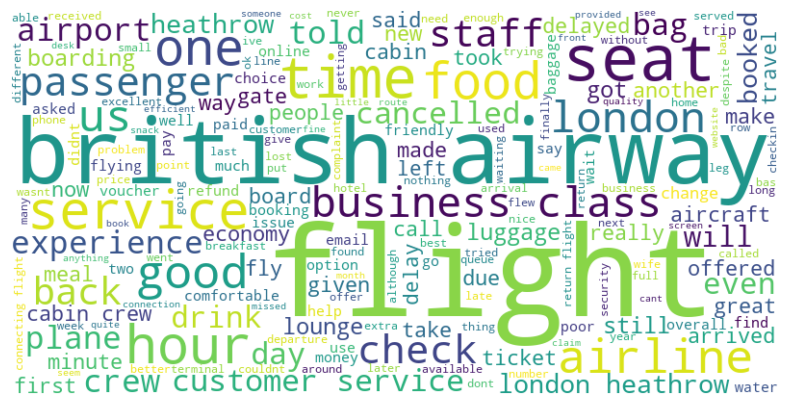

In [33]:
from wordcloud import WordCloud

text = " ".join(df["cleaned_review"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [34]:
from textblob import TextBlob

# Function to get sentiment
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity  # Polarity ranges from -1 (negative) to 1 (positive)

df["sentiment"] = df["cleaned_review"].apply(get_sentiment)

# Show first few results
print(df[["cleaned_review", "sentiment"]].head())

                                      cleaned_review  sentiment
0  london heathrow t5 british airways gold wing w...   0.355406
1  very good service on this route ba2710  cabin ...  -0.096818
2  flight mainly let down by a disagreeable fligh...   0.190173
3  another  experience by british airways this fl...  -0.150000
4  the service was rude full of attitude to me th...  -0.045833


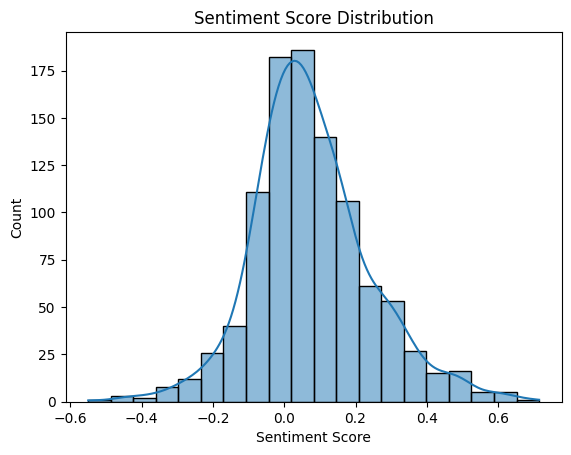

In [35]:
sns.histplot(df["sentiment"], bins=20, kde=True)
plt.title("Sentiment Score Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Count")
plt.show()


In [36]:
# Categorize sentiment into Positive, Negative, or Neutral
def categorize_sentiment(score):
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment categorization
df['sentiment_category'] = df['sentiment'].apply(categorize_sentiment)

# Get sentiment counts
sentiment_counts = df['sentiment_category'].value_counts()

# Calculate percentages
sentiment_percentages = (sentiment_counts / len(df)) * 100

# Display counts and percentages
print(sentiment_counts)
print("\nSentiment Percentages:")
print(sentiment_percentages)


sentiment_category
Positive    670
Negative    317
Neutral      13
Name: count, dtype: int64

Sentiment Percentages:
sentiment_category
Positive    67.0
Negative    31.7
Neutral      1.3
Name: count, dtype: float64


In [45]:
pip install scikit-learn

  Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata (15 kB)
  Using cached scipy-1.15.2-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl (11.1 MB)
Using cached scipy-1.15.2-cp311-cp311-win_amd64.whl (41.2 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [46]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)  # Convert text to numerical data
X = vectorizer.fit_transform(df['cleaned_review'])  # Feature matrix


In [47]:
df['sentiment_label'] = df['sentiment'].apply(lambda x: 1 if x > 0 else 0)  # Binary classification
y = df['sentiment_label']  # Target variable

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)  # Train the model

LogisticRegression()

In [50]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on test data
y_pred = model.predict(X_test)

# Print classification metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.725

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.20      0.32        66
           1       0.71      0.99      0.83       134

    accuracy                           0.72       200
   macro avg       0.79      0.59      0.57       200
weighted avg       0.76      0.72      0.66       200



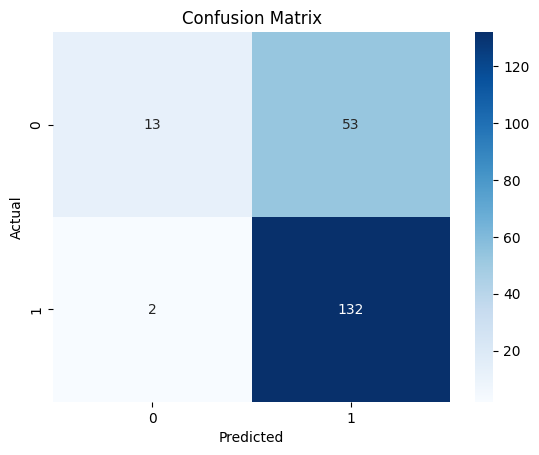

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()